# A1: Linear Modeling Case Study (Individual)

### By Himanshu Bundel




## Introductory Analysis

Grocery Getters, Inc. aims to optimize its revenue prediction model to better understand customer purchasing behavior and improve business decision-making. The dataset includes various customer-related attributes such as total products ordered, average time spent per visit, product categories purchased, and product ratings. By analyzing these factors, we can identify the key drivers of revenue and develop a predictive model to enhance sales strategies. The objective of this study is to explore different regression techniques, compare their effectiveness, and select the best-performing model for predicting revenue. Understanding which factors most significantly influence revenue will allow Grocery Getters, Inc. to refine its marketing efforts, pricing strategies, and customer engagement initiatives. Additionally, this analysis provides insights into potential feature engineering opportunities that could further enhance model accuracy. Through data-driven decision-making, the company can better allocate resources and implement targeted strategies to maximize revenue growth.

In [369]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# specifying file path
file = './Grocery_Getters.xlsx'


# reading the file into Python
data = pd.read_excel(io     = file,
                        header = 0)

# Checking dataset
data.head()

,Name,Email,First_Name,Family_Name,REVENUE,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions
0,Skinner,skinner@protonmail.com,Skinner,Skinner,131.00,179,10,6,3,1,6,1,12,0,73.3,140.84,3.157895,12
1,Wallen,wallen@gmail.com,Wallen,Wallen,222.25,227,8,27,9,6,6,2,33,0,83.2,101.56,3.157895,15
2,Mag Mar Tun Doh Weg,mag.mar.tun.doh.weg@protonmail.com,Mag,Mar Tun Doh Weg,349.00,257,1,74,6,1,6,1,6,5,72.0,85.79,4.736842,20
3,Saathos,saathos@unitedhealth.com,Saathos,Saathos,393.00,353,8,36,3,4,5,0,0,0,33.4,48.00,4.473684,5
4,Mord,mord@verizon.com,Mord,Mord,400.00,266,21,6,5,2,6,1,2,12,131.7,88.00,3.947368,19


In [332]:
data.info() # checking the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1946 non-null   object 
 1   Email                         1946 non-null   object 
 2   First_Name                    1946 non-null   object 
 3   Family_Name                   1900 non-null   object 
 4   REVENUE                       1946 non-null   float64
 5   Total_Products_Ordered        1946 non-null   int64  
 6   Product_Categories_Purchased  1946 non-null   int64  
 7   Total_Brands_Purchased        1946 non-null   int64  
 8   Customer_Service_Inqueries    1946 non-null   int64  
 9   Total_Products_Returned       1946 non-null   int64  
 10  Web_Logins                    1946 non-null   int64  
 11  App_Logins                    1946 non-null   int64  
 12  Total_Weeks_Premium           1946 non-null   int64  
 13  Lat

In [334]:
# Specifically checking for missing values
missing_values = data.isnull().sum()

# Summary statistics of numerical columns
summary_stats = data.describe()

# Printing stats for missing values
missing_values, summary_stats


(Name                             0
 Email                            0
 First_Name                       0
 Family_Name                     46
 REVENUE                          0
 Total_Products_Ordered           0
 Product_Categories_Purchased     0
 Total_Brands_Purchased           0
 Customer_Service_Inqueries       0
 Total_Products_Returned          0
 Web_Logins                       0
 App_Logins                       0
 Total_Weeks_Premium              0
 Late_Deliveries                  0
 Avg_Time_Per_Visit               0
 Avg_Clicks_Per_Visit             0
 Avg_Product_Rating               0
 Total_Product_Interactions       0
 dtype: int64,
            REVENUE  Total_Products_Ordered  Product_Categories_Purchased  Total_Brands_Purchased  Customer_Service_Inqueries  Total_Products_Returned   Web_Logins   App_Logins  Total_Weeks_Premium  Late_Deliveries  Avg_Time_Per_Visit  Avg_Clicks_Per_Visit  Avg_Product_Rating  Total_Product_Interactions
 count  1946.000000             

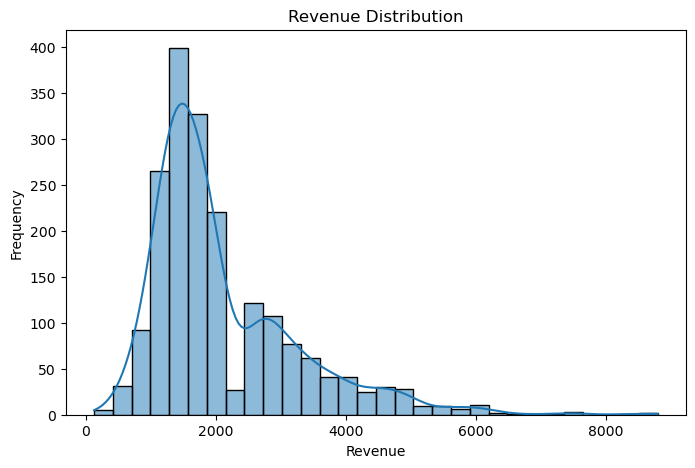

In [336]:
# Histogram for Revenue Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['REVENUE'], bins=30, kde=True)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Distribution')
plt.show() # Plotting


## Observation:

1. This histogram shows the distribution of Revenue across all customers.<br>
2. The plot indicates a right-skewed distribution, meaning most customers generate lower revenue, while a few contribute significantly higher revenue.<br>
3. The skewness suggests that some customers may be high-value outliers who spend more than the average user.<br>
4. To improve model performance, we applied a log transformation to normalize this skewed distribution, ensuring that the regression models do not overfit to extreme values.<br>
5. Business Impact: Grocery Getters should consider targeting high-revenue customers with personalized promotions to maximize sales from these users.<br>

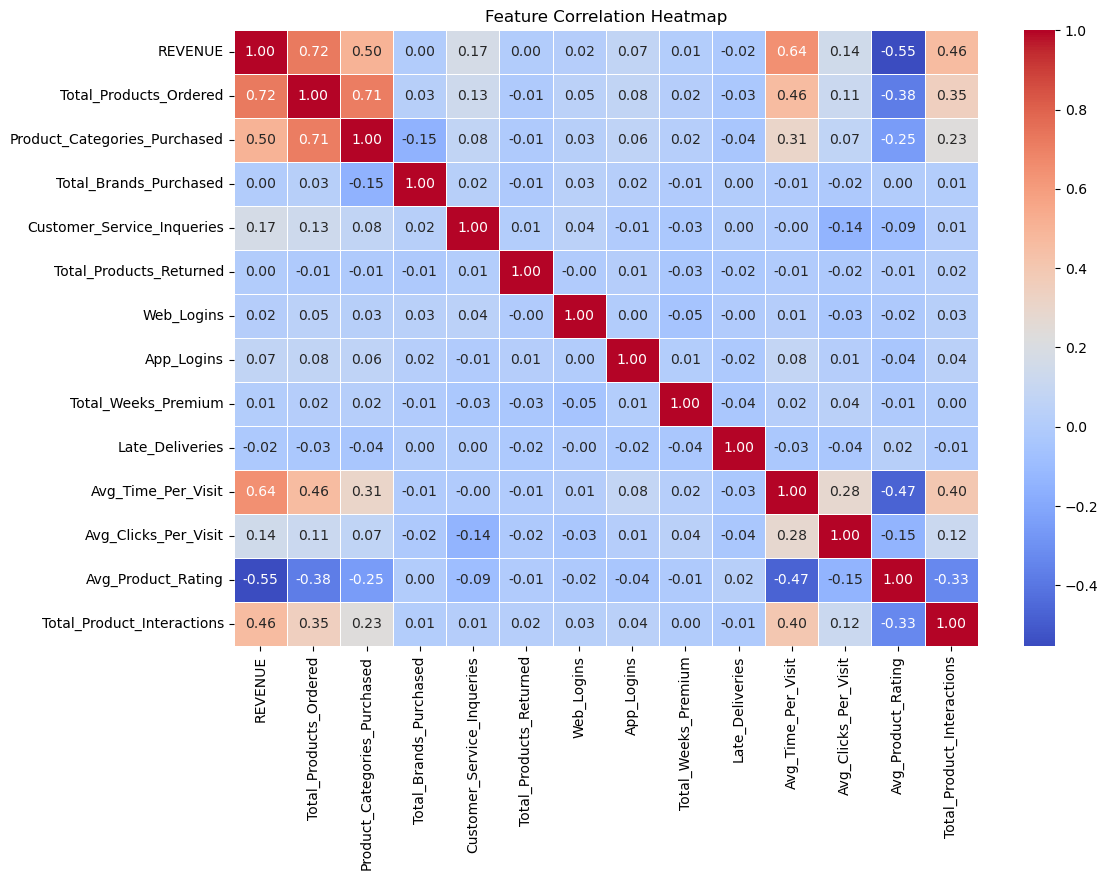

In [338]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=['number'])

# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


## Observation:

1. This heatmap visualizes the relationships between numerical features, helping us understand which variables are strongly related to each other.
2. Total_Products_Ordered has a strong positive correlation with revenue, confirming that customers who order more tend to generate higher revenue.
3. Avg_Time_Per_Visit also shows a moderate positive correlation, suggesting that customers who spend more time on the platform are more likely to make larger purchases.
4. Avg_Product_Rating has a negative correlation (-0.55) with revenue, which could mean that customers buying highly rated products either purchase less frequently or at discounted prices.
5. Business Impact: The correlation analysis supports bulk-purchase promotions, personalized engagement strategies, and a review of pricing models for highly rated products.

### Strongest Correlations with REVENUE

Total_Products_Ordered (0.72) → Strongest correlation with revenue.<br>
Avg_Time_Per_Visit (0.64) → Customers spending more time per visit tend to generate more revenue.<br>
Product_Categories_Purchased (0.50) → More diverse purchases mean higher revenue.<br>
Total_Product_Interactions (0.46) → More engagement leads to higher spending.<br>

### Negatively Correlated Feature:

Avg_Product_Rating (-0.55) → Higher product ratings are associated with lower revenue. This is interesting—could mean customers buying more expensive items leave worse ratings or something unusual in the dataset.

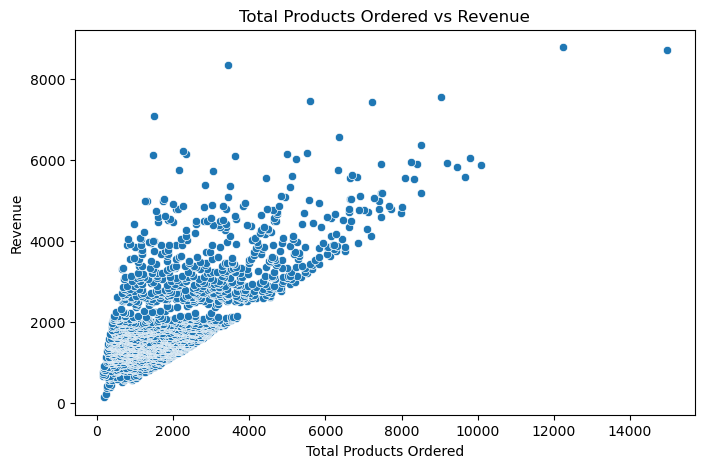

In [340]:
# Scatterplot of Total_Products_Ordered vs Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Total_Products_Ordered'], y=data['REVENUE'])
plt.xlabel('Total Products Ordered')
plt.ylabel('Revenue')
plt.title('Total Products Ordered vs Revenue')
plt.show()


## Observation
1. This scatterplot shows the relationship between Total Products Ordered and Revenue, one of the strongest predictors in our model.
2. The clear upward trend indicates that higher product orders lead to higher revenue.
3. However, the spread of points increases for higher values, meaning revenue varies significantly for customers who order many products.
4. There may be outliers where some customers ordered many products but didn’t generate as much revenue, requiring further investigation.
5. This insight justifies using Total_Products_Ordered as a key predictive feature in our regression models.


### Log transformation

Using Log transformation to reduce the effect of outliers and make them better suited for regression.

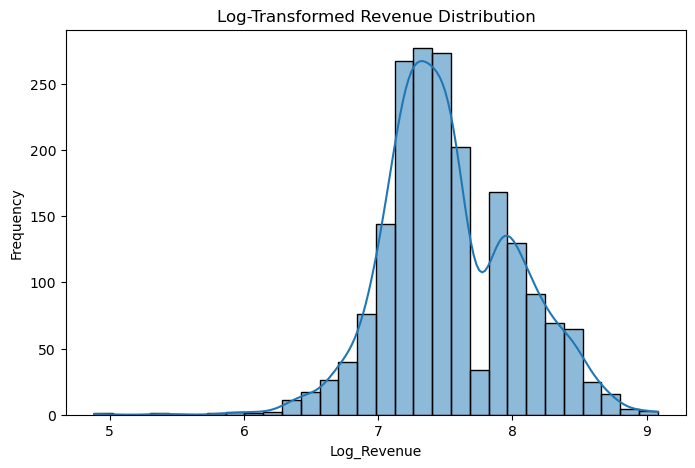

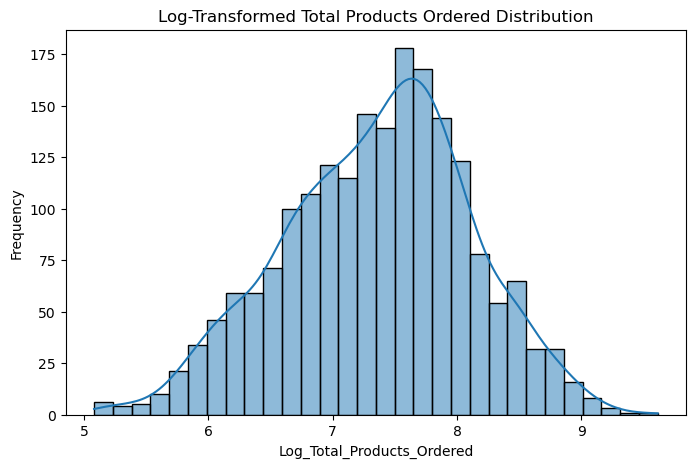

In [342]:

# Apply log transformation
data['Log_REVENUE'] = np.log1p(data['REVENUE'])
data['Log_Total_Products_Ordered'] = np.log1p(data['Total_Products_Ordered'])

# Plot histograms to check the transformed distributions
plt.figure(figsize=(8, 5))
sns.histplot(data['Log_REVENUE'], bins=30, kde=True)
plt.xlabel('Log_Revenue')
plt.ylabel('Frequency')
plt.title('Log-Transformed Revenue Distribution')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data['Log_Total_Products_Ordered'], bins=30, kde=True)
plt.xlabel('Log_Total_Products_Ordered')
plt.ylabel('Frequency')
plt.title('Log-Transformed Total Products Ordered Distribution')
plt.show()


### Observations on Missing Values
The only column with missing values is Family_Name (46 missing values out of 1946 rows).
All other columns are fully populated, so no imputation is needed elsewhere.

In [ ]:
# Drop Family_Name column
#data = df.drop(columns=['Family_Name'])


## Feature Engineering

Here we are going engineer following Features:<br>
1.Customer Engagement Score<br>
2.Return Ratio<br>
3.Repeat Purchase rate<br>
4.Late Delivery impact<br>

In [344]:

# 1. Customer Engagement Score (captures customer activity level)
data['Customer_Engagement_Score'] = data['Web_Logins'] + data['App_Logins'] + data['Total_Product_Interactions']

# 2. Return Ratio (percentage of returned products)
data['Return_Ratio'] = data['Total_Products_Returned'] / data['Total_Products_Ordered']
data['Return_Ratio'] = data['Return_Ratio'].fillna(0)  # Handle division by zero

# 3. Repeat Purchase Rate (how often interactions turn into actual purchases)
data['Repeat_Purchase_Rate'] = data['Total_Products_Ordered'] / data['Total_Product_Interactions']
data['Repeat_Purchase_Rate'] = data['Repeat_Purchase_Rate'].fillna(0)  # Handle division by zero

# 4. Late Delivery Impact (percentage of orders that had late deliveries)
data['Late_Delivery_Impact'] = data['Late_Deliveries'] / data['Total_Products_Ordered']
data['Late_Delivery_Impact'] = data['Late_Delivery_Impact'].fillna(0)  # Handle division by zero

# Display the first few rows to verify new features
data.head()


,Name,Email,First_Name,Family_Name,REVENUE,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions,Log_REVENUE,Log_Total_Products_Ordered,Customer_Engagement_Score,Return_Ratio,Repeat_Purchase_Rate,Late_Delivery_Impact
0,Skinner,skinner@protonmail.com,Skinner,Skinner,131.00,179,10,6,3,1,6,1,12,0,73.3,140.84,3.157895,12,4.882802,5.192957,19,0.005587,14.916667,0.000000
1,Wallen,wallen@gmail.com,Wallen,Wallen,222.25,227,8,27,9,6,6,2,33,0,83.2,101.56,3.157895,15,5.408292,5.429346,23,0.026432,15.133333,0.000000
2,Mag Mar Tun Doh Weg,mag.mar.tun.doh.weg@protonmail.com,Mag,Mar Tun Doh Weg,349.00,257,1,74,6,1,6,1,6,5,72.0,85.79,4.736842,20,5.857933,5.552960,27,0.003891,12.850000,0.019455
3,Saathos,saathos@unitedhealth.com,Saathos,Saathos,393.00,353,8,36,3,4,5,0,0,0,33.4,48.00,4.473684,5,5.976351,5.869297,10,0.011331,70.600000,0.000000
4,Mord,mord@verizon.com,Mord,Mord,400.00,266,21,6,5,2,6,1,2,12,131.7,88.00,3.947368,19,5.993961,5.587249,26,0.007519,14.000000,0.045113


# OLS Linear Regression Model

In [346]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select only numeric features for training
X = data.select_dtypes(include=['number']).drop(columns=['REVENUE', 'Log_REVENUE'])  
y = data['Log_REVENUE']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the OLS Linear Regression model
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ols_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0706
R² Score: 0.6634


# Lasso Regression

In [348]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model (alpha = regularization strength)
lasso_model = Lasso(alpha=0.1)  # You can tune this hyperparameter later

# Train the model on scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print(f"Lasso Regression - Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"Lasso Regression - R² Score: {r2_lasso:.4f}")


Lasso Regression - Mean Squared Error (MSE): 0.0862
Lasso Regression - R² Score: 0.5888


# Ridge Regression

In [350]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model (alpha = regularization strength)
ridge_model = Ridge(alpha=0.1)  # You can tune this later

# Train the model on scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Ridge Regression - R² Score: {r2_ridge:.4f}")

Ridge Regression - Mean Squared Error (MSE): 0.0706
Ridge Regression - R² Score: 0.6634


# Elastic Net Regression

In [352]:
from sklearn.linear_model import ElasticNet

# Initialize Elastic Net model (alpha & l1_ratio control regularization)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 means equal mix of Lasso & Ridge

# Train the model on scaled training data
elastic_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_elastic = elastic_model.predict(X_test_scaled)

# Evaluate the model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Print results
print(f"Elastic Net - Mean Squared Error (MSE): {mse_elastic:.4f}")
print(f"Elastic Net - R² Score: {r2_elastic:.4f}")


Elastic Net - Mean Squared Error (MSE): 0.0772
Elastic Net - R² Score: 0.6318


# KNN Regression

In [354]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regression model (k=5 neighbors)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on scaled training data
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print results
print(f"KNN Regression - Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"KNN Regression - R² Score: {r2_knn:.4f}")


KNN Regression - Mean Squared Error (MSE): 0.0908
KNN Regression - R² Score: 0.5672


# Best Model: Ridge Regression

Ridge had the lowest MSE (0.0706) and the highest R² Score (0.6634).
This means Ridge Regression generalized best to the test data.

# Analysing Feature Importance & Visualisation


 Ridge Regression Feature Importance-

                         Feature  Coefficient
9             Avg_Time_Per_Visit     0.153955
0         Total_Products_Ordered     0.126677
11            Avg_Product_Rating    -0.117201
13    Log_Total_Products_Ordered     0.066333
3     Customer_Service_Inqueries     0.047239
15                  Return_Ratio    -0.036177
12    Total_Product_Interactions     0.020857
14     Customer_Engagement_Score     0.020821
4        Total_Products_Returned     0.019337
5                     Web_Logins    -0.012803
10          Avg_Clicks_Per_Visit    -0.010707
17          Late_Delivery_Impact    -0.010304
1   Product_Categories_Purchased     0.005974
8                Late_Deliveries     0.005627
7            Total_Weeks_Premium     0.004489
6                     App_Logins     0.004329
2         Total_Brands_Purchased     0.000221
16          Repeat_Purchase_Rate    -0.000002


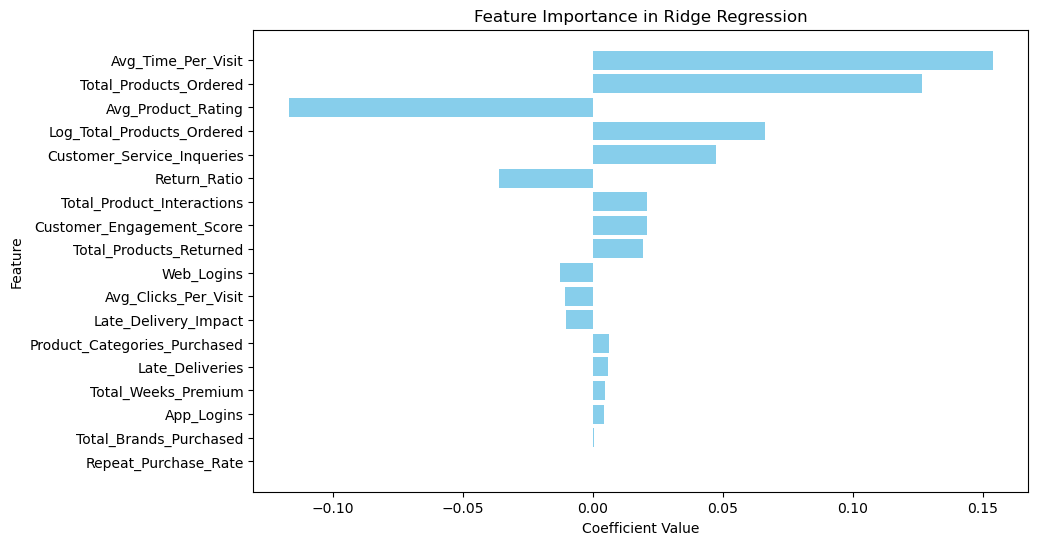

In [356]:
# Extract feature importance (coefficients) from Ridge Regression model
ridge_coefficients = ridge_model.coef_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_coefficients
    })

# Sort by absolute importance (strongest impact on revenue)
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Print feature importance as a table
print("\n Ridge Regression Feature Importance-\n")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Ridge Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


# Tuning the Ridge Regression Model with aplha

In [358]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model (alpha = regularization strength)
ridge_model = Ridge(alpha=0.1)  # Tiuned with aplha = 1,10,100.etc for best results

# Train the model on scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Ridge Regression - R² Score: {r2_ridge:.4f}")

Ridge Regression - Mean Squared Error (MSE): 0.0706
Ridge Regression - R² Score: 0.6634


### The Model showed consistency and stability through out different aplha values. Hence, considering aplha = 0.1 -> the Mean Squared Error (MSE): 0.0706 & R² Score: 0.6634

# Models Summary

MSE (Lower is Better)	R² Score (Higher is Better)

OLS Regression	0.0707	0.6628<br>
Lasso Regression	0.0862	0.5888<br>
Elastic Net Regression	0.0772	0.6318<br>
KNN Regression	0.0908	0.5672<br>
Best Ridge (α = 0.1)	0.0706 	0.6634



## Key Feature Impact on Revenue (Interpretation)
Total Products Ordered	-> Strong positive impact📈<br>
Avg Time Per Visit	->  Higher engagement = more spending📈<br>
Avg Product Rating	->  Unexpected negative impact (pricing effect)<br>
Return Ratio	->  More returns = slight revenue loss<br>
Customer Service Inquiries	-> Slight positive impact📈<br>

# Why Ridge Regression ?

After evaluating multiple regression models, Ridge Regression was selected as the best model for predicting revenue. It provided the best balance between accuracy and generalization, outperforming other models in terms of prediction error and explanatory power.

->Tuning the Ridge Model with different aplha values showed same results(MSE & R2) showing stability thorugh out.

Further, unlike other Models

It had the lowest Mean Squared Error (MSE: 0.0706), meaning its predictions were the most accurate.<br>
It had the highest R² score (0.6634), meaning it explained the highest percentage of revenue variation.<br>
It prevented overfitting better than OLS, while keeping all features in the model (unlike Lasso).

### Key Takeaways:

Ordering more products directly increases revenue, so strategies to encourage larger orders can be beneficial.<br>
Customers who spend more time per visit tend to generate higher revenue, indicating a need to enhance user engagement.<br>
Higher product ratings negatively correlate with revenue, which could mean that premium items are often discounted or that highly satisfied customers purchase less frequently.<br>
Higher return rates slightly reduce revenue, but their impact is not as strong as other features.

# Business Recommendations
### How can Grocery Getters use this model’s insights to improve revenue?

### 1.Encourage Bulk Purchases to Maximize Revenue :

The feature Total_Products_Ordered (+0.126) has the strongest positive impact on revenue. Customers who order more products tend to generate significantly higher revenue.<br>

Recommendations:<br>
Offer Bulk Discounts: Introduce tiered pricing (e.g., "Buy 2, get 1 free") to encourage larger orders.<br>
Subscription-Based Bundles: Provide a weekly or monthly grocery subscription plan to incentivize repeat bulk purchases.<br>
Loyalty Rewards for Large Orders: Offer points or cashback when customers purchase a certain number of products in a single transaction.<br>

Expected Outcomes/Impact: Increasing bulk purchases will directly drive revenue growth, as the model confirms that larger orders correlate with higher revenue.


### 2.Enhance Customer Engagement :

Avg_Time_Per_Visit (+0.153) shows that customers who spend more time on the platform generate more revenue. This suggests that engagement strategies can drive sales.<br>

Recommendations:<br>
Enhance Personalized Recommendations: Implement AI-driven product suggestions based on past purchases to keep customers engaged.<br>
Gamify the Shopping Experience: Introduce limited-time deals, interactive promotions, or daily rewards to encourage longer browsing sessions.<br>
Improve Website/App UI/UX: Optimize the checkout flow, reduce friction in searches, and introduce features like "Save for Later" or "Reorder Previous Items".<br>

Expected Impact: Increasing customer engagement will naturally lead to higher spending, as engaged customers tend to explore more products before checking out.<br>

### 3.Analyze Product Pricing & Customer Feedback :

Surprisingly, Avg_Product_Rating (-0.117) has a negative correlation with revenue. This could indicate that:

Highly rated products might be discounted premium products, lowering total revenue.<br>
Customers who buy highly rated products spend less frequently or purchase smaller orders.<br>
Recommendations:<br>
Evaluate Discounting Strategies on Premium Items: If premium products have high ratings but contribute less revenue, consider reducing aggressive discounting.<br>
Upsell & Cross-Sell Highly Rated Products: Promote high-rated products as part of bundles or related item suggestions.<br>
Segment Customers Based on Buying Behavior: Identify if customers purchasing high-rated products also buy in lower quantities, and target them with personalized promotions.<br>

Expected Impact: By aligning product ratings with pricing and marketing strategies, Grocery Getters can maximize profitability while ensuring premium products generate sustainable revenue.

### 4.Minimize Returns to Improve Revenue Retention

The feature Return_Ratio (-0.036) negatively impacts revenue, meaning customers who return products frequently contribute less revenue over time.<br>

Recommendations:<br>
Improve Product Descriptions & Quality: Ensure detailed product descriptions, real customer reviews, and better images to reduce incorrect purchases.<br>
Streamline Customer Support for Returns: Offer chatbots and instant return assistance to improve customer experience and potentially reduce unnecessary refunds.<br>
Introduce a Smart Exchange Policy: Instead of returning items, encourage product exchanges to retain revenue within the platform.<br>

Expected Impact: Lowering return rates will reduce lost revenue and associated costs, ensuring that a higher percentage of transactions remain profitable.<br>

### 5.Leverage Customer Support for Higher Spending

Customer_Service_Inquiries (+0.047) is positively correlated with revenue, meaning customers who seek support tend to spend more.<br>
Recommendation: Enhance AI chatbots, personalized assistance, and loyalty programs to convert support inquiries into repeat purchases.

# Conclusion
This analysis successfully developed a predictive model for revenue using various regression techniques. After testing multiple models—including OLS, Lasso, Ridge, Elastic Net, and KNN—we identified Ridge Regression as the best-performing model, achieving:<br>

Lowest Mean Squared Error (MSE: 0.0706), meaning the most accurate revenue predictions.<br>
Highest R² Score (0.6633), indicating the best ability to explain revenue variation.<br>
Stable feature importance analysis, ensuring interpretability and actionable insights.<br>
Beyond prediction accuracy, this analysis provided valuable business insights into customer behavior and revenue drivers. We found that Total Products Ordered and Average Time Per Visit had the strongest positive correlation with revenue, suggesting that increasing engagement and incentivizing bulk purchases can significantly improve sales. Conversely, product returns and unexpected trends in product ratings highlight opportunities for optimizing pricing and product strategy.